In [1]:
from AnastrisTNG import TNGsimulation,TNGtools,Anatools
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
import gal1d

### 载入需要拟合的数据

In [3]:
BATHPATH='/home/dumin/IllustrisTNG/TNG50-1/output/'
snap99=TNGsimulation.Snapshot(BasePath=BATHPATH,Snap=99)

In [4]:
sub= snap99.load_particle(12)
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

In [5]:
dmr99 = sub.r(0.99,calfor='dm',calpa='mass')
pr = TNGtools.Profile(sub.dm,ndim=3,rmax=dmr99,rmin=3)
rdm = pr['rbins'][pr['density']>0]
rhodm = pr['density'][pr['density']>0]

In [6]:
sub.R_vir(200)

SimArray(131.12839301, 'kpc')

### 拟合profile，有些profile参数过多，需要将BOUND范围设置小一些

In [7]:
gal1d.DoublePowerLawProfile.BOUND['alpha']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['beta']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['gamma']=[0,5]
dou,jic = gal1d.DoublePowerLawProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in dou.keys():
    print(i,dou[i])
dou.formular()

density_scale_radius 5054039.010389968
scale_radius 18.225014577268567
alpha 1.1470791939356226
beta 3.9698686282188578
gamma 1.3270939653035245


In [8]:
nfw,jic = gal1d.NFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in nfw.keys():
    print(i,nfw[i])
nfw.formular()

scale_radius 11.07602421818323
density_scale_radius 14757285.019701986


In [9]:
gnfw,jic = gal1d.GNFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in gnfw.keys():
    print(i,gnfw[i])
gnfw.formular()

density_scale_radius 28899069.75179587
scale_radius 8.475945881311544
gamma 0.7831804677589941


In [10]:

ein,jic = gal1d.EinastoProfile.fit(rdm,rhodm,use_analytical_jac=False)
for i in ein.keys():
    print(i,ein[i])
ein.formular()

density_scale_radius 396890.8313965431
scale_radius 27.24738976609677
Einasto_index 2.8352895854421742


### 半径以内的所有质量

In [11]:
np.log10(gnfw.enclosed_mass(200))

11.671168819225045

In [12]:
np.log10(nfw.enclosed_mass(200))

11.702378401831742

In [13]:
np.log10(sub.dm['mass'].sum())

SimArray(11.30674471, 'Msol')

In [14]:
np.log10(ein.enclosed_mass(200))

11.39780672998509

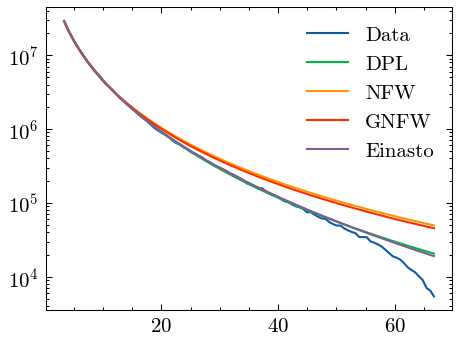

In [15]:
plt.figure(dpi=150)
plt.plot(rdm,rhodm,label='Data')
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')

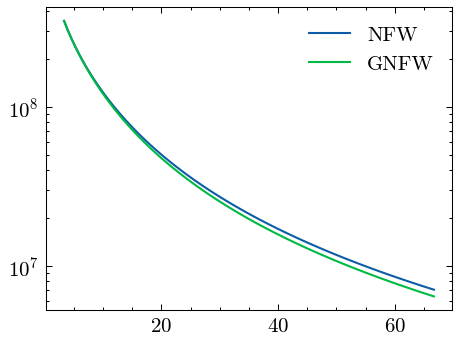

In [16]:
plt.figure(dpi=150)
plt.plot(rdm,nfw.density_2d(rdm),label='NFW')
plt.plot(rdm,gnfw.density_2d(rdm.view(np.ndarray)),label='GNFW')
plt.legend()
plt.yscale('log')
#plt.xscale('log')

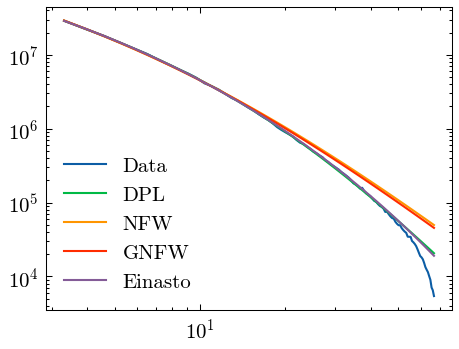

In [17]:
plt.figure(dpi=150)
plt.plot(rdm,rhodm,label='Data')
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')
plt.xscale('log')

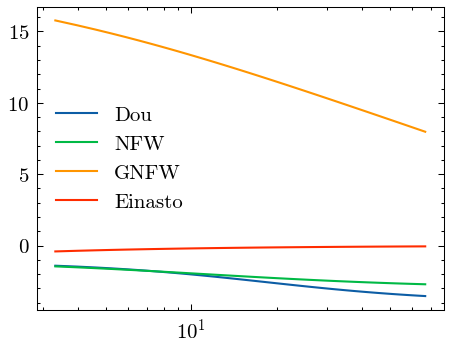

In [18]:
plt.figure(dpi=150)
plt.plot(rdm,dou.logarithmic_slope(rdm),label='Dou')
plt.plot(rdm,nfw.logarithmic_slope(rdm),label='NFW')
plt.plot(rdm,gnfw.logarithmic_slope(rdm),label='GNFW')
plt.plot(rdm,ein.logarithmic_slope(rdm),label='Einasto')
plt.legend()
#plt.yscale('log')
plt.xscale('log')

In [19]:
starR99 = sub.R(0.95,calfor='star',calpa='mass')
pR = TNGtools.Profile(sub.s,ndim=2,rmax=starR99,rmin=1)
Rstar = pR['rbins'][pR['density']>0]
denstar = pR['density'][pR['density']>0]

### 拟合以及表达式

In [ ]:
gal1d.SersicProfile.BOUND['n']=[0.2,20]

ser,jic =gal1d.SersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in ser.keys():
    print(i,ser[i])
ser.formular()

n 12.814111299756027
r_e 2.9437545350928365
I_e 106424635.90944803


In [21]:
#gal1d.CoreSersicProfile.BOUND['n']=[0.2,20]

cor,jic =gal1d.CoreSersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in cor.keys():
    print(i,cor[i])
cor.formular()

I_b 240947441.96128416
r_b 10.029138217327654
r_e 15.816692042567487
n 1.6826367155121595
alpha 1.9229217448483318
gamma 1.3533714370462937


In [22]:
exp,jic =gal1d.ExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in exp.keys():
    print(i,exp[i])
exp.formular()

h 2.61271750674011
I_0 480554130.0090703


### 所有质量

In [23]:
np.log10(ser.total_mass())

10.567801716956229

In [24]:
np.log10(exp.total_mass())

10.314107093019759

In [25]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

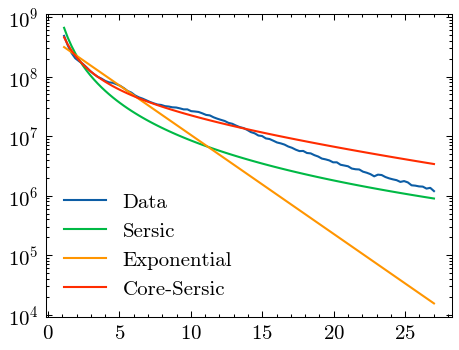

In [26]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data')
plt.plot(Rstar,ser(Rstar),label='Sersic')
plt.plot(Rstar,exp(Rstar),label='Exponential')
plt.plot(Rstar,cor(Rstar),label='Core-Sersic')
plt.legend()
plt.yscale('log')

## 拟合多成分的曲线，用MultiProfiles，add_profile

In [27]:
Ser_Exp = gal1d.MultiProfiles()
gal1d.SersicProfile.BOUND['n'] = [0,8]
Ser_Exp.add_profile(gal1d.SersicProfile)
Ser_Exp.add_profile(gal1d.ExponentialProfile)
Ser_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [28]:
Ser_Exp

<||SersicProfile|ExponentialProfile||>

(1000000.0, 1000000000.0)

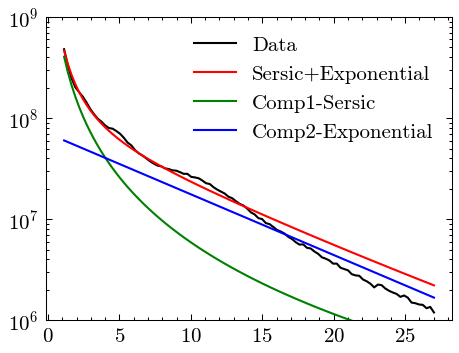

In [29]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,Ser_Exp(Rstar),label='Sersic+Exponential',c='r')
plt.plot(Rstar,Ser_Exp['c1']*Ser_Exp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_Exp['c2']*Ser_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e6,1e9)

### 半径以内的质量，以及各个成分的质量占比

In [30]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

In [31]:
np.log10(Ser_Exp.enclosed_mass(20))

10.528868282819703

In [32]:
np.array(Ser_Exp.components_enclosed_mass(20))/Ser_Exp.enclosed_mass(20)

array([0.47915475, 0.52084525])

In [33]:
Dou_Exp = gal1d.MultiProfiles()
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.fit(Rstar,denstar,use_analytical_jac=True)

(1000000.0, 1000000000.0)

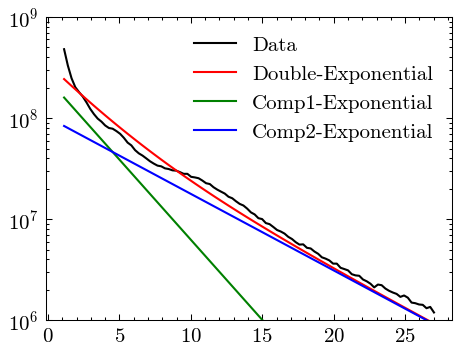

In [34]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,Dou_Exp(Rstar),label='Double-Exponential',c='r')
plt.plot(Rstar,Dou_Exp['c1']*Dou_Exp['p1'](Rstar),label='Comp1-Exponential',c='g')
plt.plot(Rstar,Dou_Exp['c2']*Dou_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e6,1e9)

In [35]:
Dou_Ser = gal1d.MultiProfiles()
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.fit(Rstar,denstar,use_analytical_jac=True)

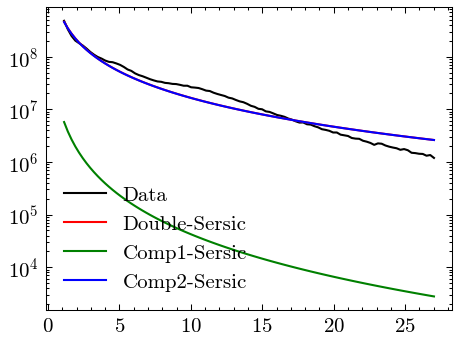

In [36]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,Dou_Ser(Rstar),label='Double-Sersic',c='r')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[0],label='Comp1-Sersic',c='g')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[1],label='Comp2-Sersic',c='b')
plt.legend()
plt.yscale('log')
#plt.ylim(1e6,1e9)

In [37]:
CorSer_Exp = gal1d.MultiProfiles()
CorSer_Exp.add_profile(gal1d.CoreSersicProfile)
CorSer_Exp.add_profile(gal1d.ExponentialProfile)
CorSer_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [38]:
CorSer_Exp

<||CoreSersicProfile|ExponentialProfile||>

(1000000.0, 1000000000.0)

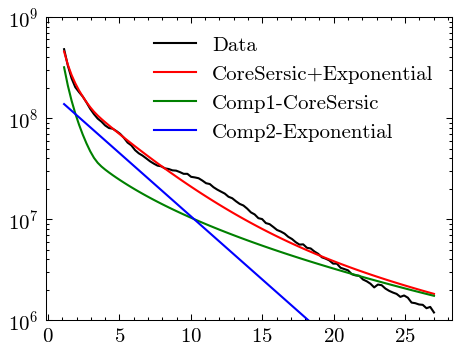

In [39]:
plt.figure(dpi=150)
plt.plot(Rstar,denstar,label='Data',c='k')
plt.plot(Rstar,CorSer_Exp(Rstar.view(np.ndarray)),label='CoreSersic+Exponential',c='r')
plt.plot(Rstar,CorSer_Exp['c1']*CorSer_Exp['p1'](Rstar),label='Comp1-CoreSersic',c='g')
plt.plot(Rstar,CorSer_Exp['c2']*CorSer_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e6,1e9)

In [40]:
CorSer_Exp['p1']

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>

In [41]:
print(CorSer_Exp['p1'])
for i in CorSer_Exp['p1'].keys():
    print(i, CorSer_Exp['p1'][i])

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>
I_b 310585878.4124689
r_b 3.3397965047754967
r_e 18.286381465299648
n 2.3611453060963226
alpha 17.14220086041522
gamma 1.9969149107492807


In [42]:
print(CorSer_Exp['p2'])
for i in CorSer_Exp['p2'].keys():
    print(i, CorSer_Exp['p2'][i])

<ExponentialProfile['h', 'I_0']>
h 3.470218090072118
I_0 190558865.7835664
